<a href="https://colab.research.google.com/github/krishbhowmick/NLP/blob/main/NLP2_3a_FakeNewsClassifier_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fake News Classifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd 

In [ ]:
X=pd.read_csv('/content/drive/My Drive/DataScience_DataSet/NLP/fake-news/test.csv')
print( X.shape )
X.head()

(5200, 4)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
x= X.isnull().sum() 
x

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
Y=pd.read_csv('/content/drive/My Drive/DataScience_DataSet/NLP/fake-news/submit.csv')   # level
print( Y.shape )
Y.head()

(5200, 2)


,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [ ]:
y= Y.isnull().sum() 
y

id       0
label    0
dtype: int64

In [ ]:
df = pd.merge(X, Y, on='id', how='inner')
df.head(2)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(4575, 5)

In [ ]:
df.head(10)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...,1
10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...,0
11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ...",1
12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...,0
13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...,1


In [ ]:
messages=df.copy()

In [ ]:
messages.reset_index(inplace=True)      #Reset_Index

In [ ]:
messages.head(10)

,index,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1
5,7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...,1
6,10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...,0
7,11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ...",1
8,12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...,0
9,13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...,1


In [ ]:
## Get the Independent Features

X=messages.drop('label',axis=1)
xx= X.drop('id',axis=1)
x = xx.drop('index',axis=1)
x.head(6)

,title,author,text
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
5,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...


In [ ]:
## Get the Dependent features
y=messages['label']
y

0       0
1       0
2       1
3       1
4       1
       ..
4570    1
4571    0
4572    1
4573    0
4574    0
Name: label, Length: 4575, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer   #CountVectorizer-
                                                                                                  #TfidfVectorizer- 
                                                                                                  #HashingVectorizer-

In [ ]:
messages['text'][2]

'If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. He will hold a workout for M. L. B. teams this month, his agents told ESPN and other news outlets. “This may sound like a publicity stunt, but nothing could be further from the truth,” said Brodie Van Wagenen,   of CAA Baseball, part of the sports agency CAA Sports, in the statement. “I have seen Tim’s workouts, and people inside and outside the industry  —   scouts, executives, players and fans  —   will be impressed by his talent. ” It’s been over a decade since Tebow, 28, has played baseball full time, which means a comeback would be no easy task. But the former major league catcher Chad Moeller, who said in the statement that he had been training Tebow in Arizona, said he was “beyond impressed with Tim’s athleticism and swing. ” “I see bat speed and power and real basebal

In [ ]:
# Remove Special Character from Text
import nltk                                     #
import re                                       #
from nltk.corpus import stopwords               # Some words whose are not as important in sentence
from nltk.stem.porter import PorterStemmer      # 

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#All the important words(PorterStmmer) are store in corpus
corpus[3]

'min ago view comment like first time histori film panoram video station mean see everyth see eye say abl feel like real cosmonaut borisenko rt video present rt collabor russian space agenc roscosmo rocket space corpor energia project websit space rt com subscrib like leav repli login social id email address publish name'

## **TF-IDF Vectorizer** 

Transforms text to feature vectors that can be used as input to estimator. (vocabulary_) Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. ... In each vector the numbers (weights) represent features tf-idf score.

### **What is the difference between CountVectorizer and TfidfVectorizer?**

The only difference is that the TfidfVectorizer() returns floats while the CountVectorizer() returns ints. 
TfidfVectorizer() assigns a score while CountVectorizer() counts.

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))    #max_features=5000, ngram_range=(1,3)--Combination of 1-3 words
X=tfidf_v.fit_transform(corpus).toarray()                       # We have done TF-IDF 

In [ ]:
tfidf_v

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X.shape

(4575, 5000)

In [ ]:
y=messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
# Top 20 features from (TF-IDF Vectorizer)
tfidf_v.get_feature_names()[:20] 

['aaron',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'aboard',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi']

In [ ]:
# Parameters of (TF-IDF Vectorizer)
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
# DataFrame using only X_train
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [ ]:
count_df.head()

,aaron,abandon,abba,abc,abc news,abe,abedin,abil,abl,aboard,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accident,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,across,...,www infowarsstor,www infowarsstor com,xi,yahoo,yanke,yard,yate,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,year year,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.057094,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024421,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040764,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026989,0.044295,0.0,0.0,0.000000,0.0,0.0,0.0,0.149668,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.040319,0.0,0.0,0.0,0.0,0.073524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [ ]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.759
Confusion matrix, without normalization


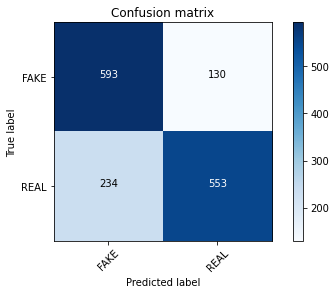

In [ ]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7589403973509934

In [ ]:
y_train.shape

(3065,)

### Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()  #n_iter=50

accuracy:   0.841
Confusion matrix, without normalization


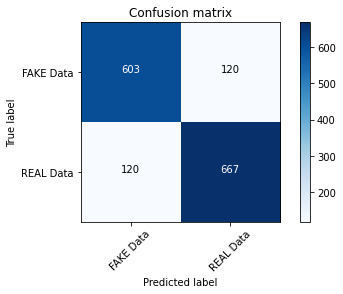

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.752317880794702
Alpha: 0.1, Score : 0.7562913907284768
Alpha: 0.2, Score : 0.7562913907284768
Alpha: 0.30000000000000004, Score : 0.7589403973509934
Alpha: 0.4, Score : 0.7576158940397351
Alpha: 0.5, Score : 0.7589403973509934
Alpha: 0.6000000000000001, Score : 0.7609271523178808
Alpha: 0.7000000000000001, Score : 0.7609271523178808
Alpha: 0.8, Score : 0.7615894039735099
Alpha: 0.9, Score : 0.7615894039735099


In [ ]:
## Get Features names
vc = CountVectorizer()
feature_names = vc.get_feature_names()              # cv- count vectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

NotFittedError: ignored

In [ ]:
classifier.coef_[0]

array([-8.67443887, -9.21020051, -9.32218119, ..., -8.97600111,
       -8.5625608 , -8.87488998])

In [ ]:
### Most real
#sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

In [ ]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

NameError: ignored

## HashingVectorizer


In [ ]:
hs_vectorizer=HashingVectorizer(n_features=5000,non_negative=True)
X=hs_vectorizer.fit_transform(corpus).toarray()

TypeError: ignored

In [ ]:
X.shape

(18285, 5000)

In [ ]:
X

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.871
Confusion matrix, without normalization


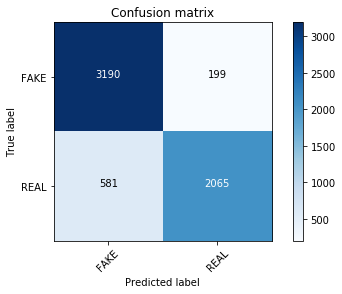

In [ ]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])